# Background:
Alphabet Soup is a non-profit organization involved in raising and donating funds for environmental improvement efforts. The organization wants to ensure the funds are used effectively. Experience has shown not all funds donated to organizations with the intention of environmental improvements have been used wisely. Alphabet Soup is interested in classifying which organizations are worth donating to and which are high risk using a deep learning neural network that is capable of using all (most) of the available data in predicting whether applicants will be "successful" if funded by Alphabet Soup.  This model will be used to assist Alphabet Soup in determining which organizations receive future donations.


# Problem Statement: 
Create a binary classifier to predict whether applicants will be successful if funded by Alphabet Soup.

# Deliverables

1. Preprocessing Data for a Neural Network Model
2. Compile, Train, and Evaluate the Model
3. Optimize the Model
4. A Written Report on the Neural Network Model (README.md)

## Preprocessing the Data for a Neural Network (Deliverable 1)

In [1]:
# import common libraries
import pandas as pd

In [2]:
# Import dependencies from sklearn
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
# import dependencies from tensorflow
import tensorflow as tf

Read in the charity_data.csv to a Pandas DataFrame, and be sure to identify the following in your dataset:

* What variable is considered the target for your model?
the target variable is IS_SUCCESSFUL

* What variable(s) are considered the feature(s) for your model?
The following are all part of the features maxtrix (X)
1. APPLICATION_TYPE
2. AFFILIATION
3. CLASSIFICATION
4. USE_CASE
5. ORGANIZATION
6. STATUS
7. INCOME_AMT
8. SPECIAL_CONSIDERATIONS
9. ASK_AMT

In [4]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Data Dictionary:

* EIN and NAME—Identification columns
* APPLICATION_TYPE—Alphabet Soup application type
* AFFILIATION—Affiliated sector of industry
* CLASSIFICATION—Government organization classification
* USE_CASE—Use case for funding
* ORGANIZATION—Organization type
* STATUS—Active status
* INCOME_AMT—Income classification
* SPECIAL_CONSIDERATIONS—Special consideration for application
* ASK_AMT—Funding amount requested
* IS_SUCCESSFUL—Was the money used effectively

In [5]:
# explore the data
application_df.info() # 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [6]:
# check the mix of the target variable
application_df["IS_SUCCESSFUL"].value_counts()

# there appears to be a good mix of successful and not successful applications

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns= ["EIN", "NAME"], inplace=True)
application_df.info() # 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [8]:
# Generate a list of numeric (non-categorical) columns
application_not_cat = application_df.dtypes[application_df.dtypes != "object"].index.tolist()
application_not_cat

['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']

In [9]:
# Determine the number of unique values in each column of application_not_cat.
application_df[application_not_cat].nunique()

# it appears "STATUS" is binary and ASK_AMT is continuous

STATUS              2
ASK_AMT          8747
IS_SUCCESSFUL       2
dtype: int64

In [10]:
# Generate our categorical variable list (having Dtype of "object")

application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

Note: APPLICATION_TYPE and CLASSIFICATION have more than 10 unique values
Examine the unique values and bin to reduce to a "managable" number

In [11]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

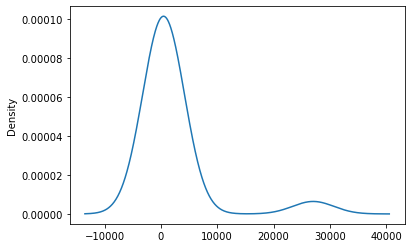

In [12]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [13]:
# Determine which values to replace
replace_application_type = list(application_type[application_type < 1000].index)

# Replace in DataFrame
for application_type in replace_application_type:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(application_type, "Other")
    
# check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
classification_type = application_df["CLASSIFICATION"].value_counts()
classification_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

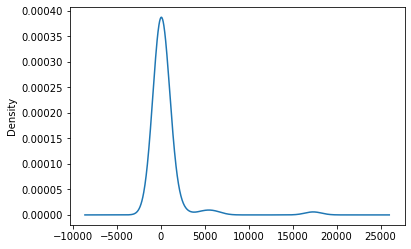

In [15]:
# Visualize the value counts of CLASSIFICATION
classification_type.plot.density()

In [16]:
# Determine which values to replace
replace_classification_type = list(classification_type[classification_type < 500].index)

# Replace in DataFrame
for classification_type in replace_classification_type:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(classification_type, "Other")
    
# check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [17]:
# Generate our categorical variable list (having Dtype of "object")

application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            7
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APPLICATION_TYPE_Other        34299 non-null  float64
 1   APPLICATION_TYPE_T19          34299 non-null  float64
 2   APPLICATION_TYPE_T3           34299 non-null  float64
 3   APPLICATION_TYPE_T4           34299 non-null  float64
 4   APPLICATION_TYPE_T5           34299 non-null  float64
 5   APPLICATION_TYPE_T6           34299 non-null  float64
 6   AFFILIATION_CompanySponsored  34299 non-null  float64
 7   AFFILIATION_Family/Parent     34299 non-null  float64
 8   AFFILIATION_Independent       34299 non-null  float64
 9   AFFILIATION_National          34299 non-null  float64
 10  AFFILIATION_Other             34299 non-null  float64
 11  AFFILIATION_Regional          34299 non-null  float64
 12  CLASSIFICATION_C1000          34299 non-null  float64
 13  C

In [20]:
encode_df.shape

(34299, 39)

Now that our categorical variables have been encoded, they are ready to replace our unencoded categorical variables in our dataset.

To replace these columns, we'll use a combination of Pandas' merge and drop methods. Add and run the following code in the notebook:

In [21]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis= 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# check that all columns are numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T19          34299 non-null  float64
 5   APPLICATION_TYPE_T3           34299 non-null  float64
 6   APPLICATION_TYPE_T4           34299 non-null  float64
 7   APPLICATION_TYPE_T5           34299 non-null  float64
 8   APPLICATION_TYPE_T6           34299 non-null  float64
 9   AFFILIATION_CompanySponsored  34299 non-null  float64
 10  AFFILIATION_Family/Parent     34299 non-null  float64
 11  AFFILIATION_Independent       34299 non-null  float64
 12  AFFILIATION_National          34299 non-null  float64
 13  A

Note: all the dtypes are not numeric (float64)

In [26]:
# Split our preprocessed data into our features and target arrays
y= application_df["IS_SUCCESSFUL"].values
X= application_df.drop(["IS_SUCCESSFUL"], axis=1).values

In [27]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# check the number of features in X
len(X_train[0])

41

### Deliverable 2: Compile, Train and Evaluate the Model 


In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  (number_input_features * 3)
hidden_nodes_layer2 = (number_input_features * 0.5)

nn_inital = tf.keras.models.Sequential()

# First hidden layer
nn_inital.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu")
)

# Second hidden layer
nn_inital.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu")
)

# third hidden layer
# nn.add(tf.keras.layers.Dense(
#     units=hidden_nodes_layer3,
#     activation="sigmoid"
# ))

# Output layer
nn_inital.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn_inital.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 123)               5166      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2480      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 7,667
Trainable params: 7,667
Non-trainable params: 0
_________________________________________________________________


Now that we have our training data ready, we can implement checkpoints to our deep learning model.

Now that we have our training data and our model defined, we're ready to compile and train our model using checkpoints. To use checkpoints, we need to define the checkpoint file name and directory path. For our purposes, we'll label our checkpoints by epoch number and contain them within their own folder. This ensures that our checkpoint files are neat, organized, and easily identifiable. Add and run the following code to our notebook:

In [42]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

Once we have defined the file structure and filepath, we need to create a callback object for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process.There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:

* filepath=checkpoint_path—the checkpoint directory and file structure we defined previously
* verbose=1—we'll be notified when a checkpoint is being saved to the directory
* save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
* save_freq=1000—checkpoints will be saved every thousand samples tested (across all epochs)

Bringing it all together, we can compile, train, and evaluate our deep learning model by adding and running the following code:

Now it is time to compile our model and define the loss and accuracy metrics. Since we want to use our model as a binary classifier, we'll use the binary_crossentropy loss function, adam optimizer, and accuracy metrics. To compile the model, add and run the following code:

In [43]:
# Compile the model
nn_inital.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# creat a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose= 1,
    save_weights_only=True,
    save_freq=1000
)    

In [44]:
# Train the model (include parameter for callbacks=
fit_model = nn_inital.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
570/804 [====================>.........] - ETA: 0s - loss: 0.5759 - accuracy: 0.7188
Epoch 00001: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 1s 729us/step - loss: 0.5739 - accuracy: 0.7192
Epoch 2/100
760/804 [===========================>..] - ETA: 0s - loss: 0.5563 - accuracy: 0.7312
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 891us/step - loss: 0.5573 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 1s 906us/step - loss: 0.5546 - accuracy: 0.7324
Epoch 4/100
163/804 [=====>........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.7322
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5525 - accuracy: 0.7325
Epoch 5/100
333/804 [===========>..................] - ETA: 0s - loss: 0.5529 - accuracy: 0.7322
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7249
Loss: 0.557121753692627, Accuracy: 0.7248979806900024


After running the previous code, we have created our trained model within the Python session, as well as a folder of checkpoints we can use to restore previous model weights. 

## Model Assessment:
According to the accuracy metric of the neural network model was only able to correctly classify about 72.4%

Loss: 0.557121753692627, Accuracy: 0.7248979806900024

<AxesSubplot:>

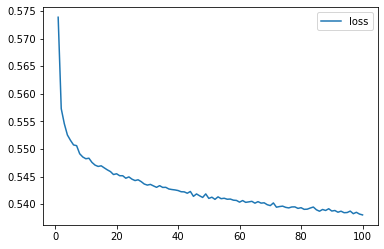

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

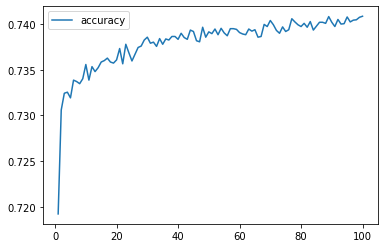

In [49]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [51]:
# export the fully trained model to HDF5 file
# note: The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data. 

nn_inital.save("./Trained_Models/trained_attrition.h5")

note: After running the code, we  see a file named "trained_attrition.h5," in the Trained_Model folder which contains the complete model and configuration. 

Now that we have the model saved, we can create the model at any point. Let's try importing the model into the notebook without providing any structure or context. 

To import the model, add and run the following code:

In [52]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('./Trained_Models/trained_attrition.h5')

In [54]:
# Evaluate the imported model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5581 - accuracy: 0.7261
Loss: 0.5581235289573669, Accuracy: 0.726064145565033
